In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [13]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True,
    as_frame=False
)
pixel_values, targets = data
targets = targets.astype(int)

In [14]:
pixel_values.shape

(70000, 784)

In [15]:
pixel_values[1, :]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

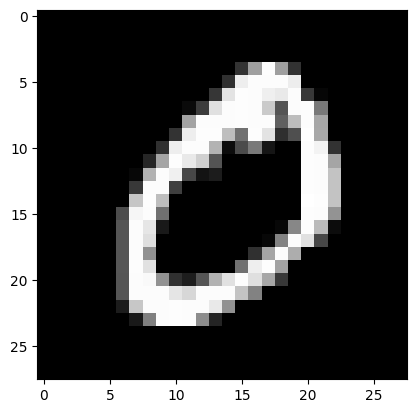

In [29]:
single_image = pixel_values[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='grey')

In [24]:
tsne = manifold.TSNE(n_components=2, random_state=2)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [30]:
transformed_data

array([[ 12.954731 ,  -1.0971161],
       [ 62.483955 ,  -2.7378652],
       [  6.1138625, -48.819656 ],
       ...,
       [-29.289536 , -17.57363  ],
       [-14.039195 ,  24.992523 ],
       [ 17.952282 , -18.839064 ]], dtype=float32)

In [31]:
transformed_data.shape

(3000, 2)

In [32]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=['x', 'y', 'targets']
)

In [33]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        3000 non-null   float64
 1   y        3000 non-null   float64
 2   targets  3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [34]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [36]:
tsne_df

,x,y,targets
0,12.954731,-1.097116,5.0
1,62.483955,-2.737865,0.0
2,6.113863,-48.819656,4.0
3,-48.723255,18.182810,1.0
4,-8.072317,-30.595200,9.0
...,...,...,...
2995,-36.268528,-23.757668,7.0
2996,57.130291,-5.673147,0.0
2997,-29.289536,-17.573629,9.0
2998,-14.039195,24.992523,1.0


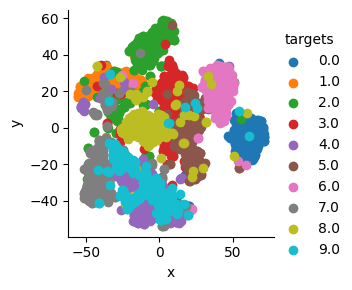

In [38]:
grid = sns.FacetGrid(tsne_df, hue="targets")

grid.map(plt.scatter, "x", "y").add_legend()